In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import glob as glob
import matplotlib.gridspec as gridspec
from netCDF4 import Dataset

import matplotlib.colors as colors
import matplotlib.cm as cmx
from itertools import product

import time
from datetime import datetime

import scipy.io as sio

import matplotlib.tri as tri

from mpl_toolkits.basemap import Basemap

import cmocean 

In [3]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [4]:
directory = '/Users/laura/Documents/scripts/IMEDEA/paperASR/spectra/'

# Load selected box
mbox1 = sio.loadmat(directory + 'filter_box1.mat')

# Wavelengths:
wf1_2m_box1 = mbox1['wf1_2m'].squeeze() 
wf1_2o_box1 = mbox1['wf1_2o'].squeeze()

# Power spectral density:
Pf_HRm_m_box1 = mbox1['Pf_HRm_m'].squeeze()
Pf_HRo_m_box1 = mbox1['Pf_HRo_m'].squeeze()

mbox1 = sio.loadmat(directory + 'filter_box1_error_v2.mat')

# Errorbars:
ebm_box1 = mbox1['ebm'].squeeze()
ebo_box1 = mbox1['ebo'].squeeze()

mbox2 = sio.loadmat(directory + 'filter_box2.mat')

# Wavelengths:
wf1_2m_box2 = mbox2['wf1_2m'].squeeze()
wf1_2o_box2 = mbox2['wf1_2o'].squeeze()

# Power spectral density:
Pf_HRm_m_box2 = mbox2['Pf_HRm_m'].squeeze()
Pf_HRo_m_box2 = mbox2['Pf_HRo_m'].squeeze()

mbox2 = sio.loadmat(directory + 'filter_box2_error_v2.mat')

# Errorbars:
ebm_box2 = mbox2['ebm'].squeeze()
ebo_box2 = mbox2['ebo'].squeeze()


# Comparing non-filtered spectra:

## With zoom:

47.6
0.849314230416
47.6
0.841241710698


/Users/laura/anaconda2/lib/python2.7/site-packages/matplotlib/scale.py:101: RuntimeWarning: invalid value encountered in less_equal
  a[a <= 0.0] = 1e-300


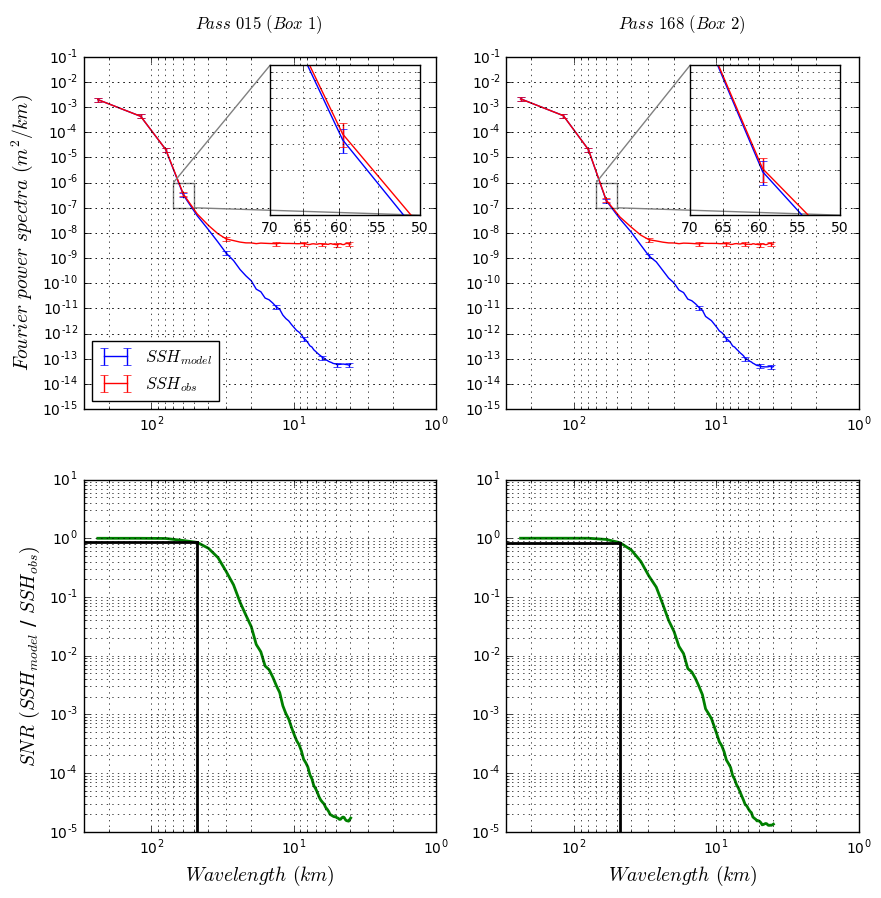

In [5]:
plt.figure(figsize=(10, 10))

gs = gridspec.GridSpec(2, 2)

ax = plt.subplot(gs[0,0])
plt.axis([300., 1., 1.e-15, 1.e-1])
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')
plt.errorbar(wf1_2m_box1, Pf_HRm_m_box1, yerr=ebm_box1.T, color='b')
plt.errorbar(wf1_2o_box1, Pf_HRo_m_box1, yerr=ebo_box1.T, color='r')
grid(b=True, which='minor')
grid(b=True, which='major')
ax.set_title('$Pass$ $015$ $(Box$ $1)$ \n')
ax.set_ylabel('$Fourier$ $power$ $spectra$ $(m^2/km)$', size='14')
ax.legend(('$SSH$$_{model}$', '$SSH$$_{obs}$'), loc='lower left') 

################################################################################
# zoom:
axins = inset_axes(ax, 1.5,1.5 , loc=1, bbox_to_anchor=(.47, .9)
                   , bbox_transform=ax.figure.transFigure) 
axins.set_xscale("log", nonposx='clip')
axins.set_yscale("log", nonposy='clip')
plt.errorbar(wf1_2m_box1, Pf_HRm_m_box1, yerr=ebm_box1.T, color='b')
plt.errorbar(wf1_2o_box1, Pf_HRo_m_box1, yerr=ebo_box1.T, color='r')
x1, x2, y1, y2 = 70., 50., 1.e-7, 1.e-6 # specify the limits

axins.set_xlim(x1, x2) # apply the x-limits
axins.set_xticks(np.arange(50., 75., 5.))
axins.set_xticklabels(np.arange(50, 75, 5))
axins.set_ylim(y1, y2) 
plt.yticks(visible=False)
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")
grid(b=True, which='major')
grid(b=True, which='minor')
################################################################################

ax = plt.subplot(gs[0,1])
plt.axis([300., 1., 1.e-15, 1.e-1])
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')
plt.errorbar(wf1_2m_box2, Pf_HRm_m_box2, yerr=ebm_box2.T, color='b')
plt.errorbar(wf1_2o_box2, Pf_HRo_m_box2, yerr=ebo_box2.T, color='r')
grid(b=True, which='minor')
grid(b=True, which='major')
ax.set_title('$Pass$ $168$ $(Box$ $2)$ \n')

################################################################################
# zoom:
axins = inset_axes(ax, 1.5,1.5 , loc=1, bbox_to_anchor=(.89, .9)
                   , bbox_transform=ax.figure.transFigure)
axins.set_xscale("log", nonposx='clip')
axins.set_yscale("log", nonposy='clip')
plt.errorbar(wf1_2m_box2, Pf_HRm_m_box2, yerr=ebm_box2.T, color='b')
plt.errorbar(wf1_2o_box2, Pf_HRo_m_box2, yerr=ebo_box2.T, color='r')
x1, x2, y1, y2 = 70., 50., 1.e-7, 1.e-6 # specify the limits
axins.set_xlim(x1, x2) # apply the x-limits
axins.set_xticks(np.arange(50., 75., 5.))
axins.set_xticklabels(np.arange(50, 75, 5))
plt.yticks(visible=False)
axins.set_ylim(y1, y2) # apply the y-limits
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")
grid(b=True, which='major')
grid(b=True, which='minor')
################################################################################

# SNR
ax = plt.subplot(gs[1,0])
plt.axis([300.,1.,1.e-5, 10])
plt.loglog(wf1_2o_box1, Pf_HRm_m_box1/Pf_HRo_m_box1,'g-',linewidth='2');
ax.set_xlabel('$Wavelength$ $(km)$', size='14')
xx = Pf_HRm_m_box1 / Pf_HRo_m_box1
lowest_wavelength = wf1_2o_box1[np.where((xx>=0.8) & (xx<=0.9))][0]
xx_0809 = xx[np.where((xx>=0.8) & (xx<=0.9))][0]
print(lowest_wavelength)
print(xx_0809)
plt.loglog([lowest_wavelength, lowest_wavelength], [1.e-6, xx_0809], 'k', linewidth='2')
plt.loglog([300., lowest_wavelength], [xx_0809, xx_0809], 'k', linewidth='2')
grid(b=True, which='minor')
grid(b=True, which='major')
ax.set_ylabel('$SNR$ $(SSH$$_{model}$ / $SSH$$_{obs})$', size='14')

ax = plt.subplot(gs[1,1])
plt.axis([300.,1.,1.e-5, 10])
plt.loglog(wf1_2o_box2, Pf_HRm_m_box2/Pf_HRo_m_box2,'g-',linewidth='2');
ax.set_xlabel('$Wavelength$ $(km)$', size='14')
xx = Pf_HRm_m_box2 / Pf_HRo_m_box2
lowest_wavelength = wf1_2o_box2[np.where((xx>=0.8) & (xx<=0.9))][0]
xx_0809 = xx[np.where((xx>=0.8) & (xx<=0.9))][0]
print(lowest_wavelength)
print(xx_0809)
plt.loglog([lowest_wavelength, lowest_wavelength], [1.e-6, xx_0809], 'k', linewidth='2')
plt.loglog([300., lowest_wavelength], [xx_0809, xx_0809], 'k', linewidth='2')
grid(b=True, which='minor')
grid(b=True, which='major')

savename = '/Users/laura/Documents/scripts/IMEDEA/paperASR/new_version_remote_sensing/figs/' + 'spectra_nofilt_v2' + '.jpeg'
plt.savefig(str(savename), bbox_inches='tight', dpi=300)

savename = '/Users/laura/Documents/scripts/IMEDEA/paperASR/new_version_remote_sensing/figs/reduced/' + 'spectra_nofilt_LOWres_v2' + '.jpeg'
plt.savefig(str(savename), bbox_inches='tight', dpi=100)

plt.show()